In [10]:
import numpy as np
import math
import scipy.stats as sts
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import seaborn as seaborn
import plotly.graph_objects as go
%matplotlib inline

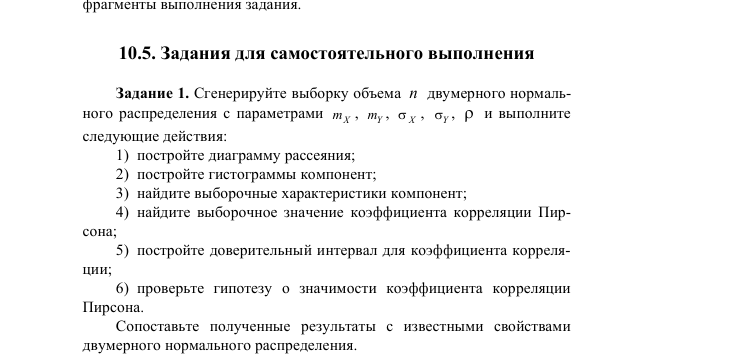

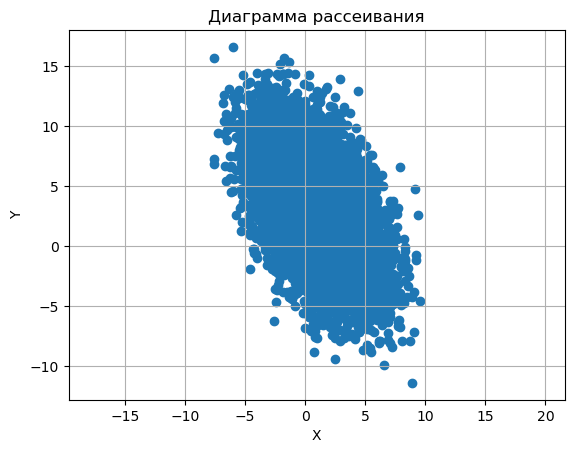

In [11]:
n = 10000
mean = [1, 3]
rho = -0.5
sigma1 = 2.5
sigma2 = 3.8
k = rho * sigma1 * sigma2
D1 = sigma1 ** 2
D2 = sigma2 ** 2
cov = [[D1, k], [k, D2]]
xy = np.random.multivariate_normal(mean, cov, n)
plt.scatter(xy[:, 0], xy[:, 1]) 
plt.grid(True)
plt.title('Диаграмма рассеивания')
plt.xlabel('X') 
plt.ylabel('Y')  
plt.axis('equal')
plt.show()

2)Диаграмммы компонент 

In [12]:
df_xy = pd.DataFrame (xy)
#sns.set(style='ticks', color_codes=True)
#sns.pairplot(df_xy, height=4.5);


3) найдите выборочные характеристики компонент

In [13]:
x = xy[:,0]
y = xy[:,1]
meanv = [np.mean(x), np.mean(y)]
varv = [np.sqrt(np.var(x)), np.sqrt(np.var(y))]
print("Выборочные мат ожидания:",meanv[0],meanv[1])
print("Выборочные среднквадр откл:",varv[0],varv[1])

Выборочные мат ожидания: 1.02142469281798 2.9686786533494787
Выборочные среднквадр откл: 2.4881901050137367 3.795531157897819


4. Выборочное значение корреляции Пирсона

In [14]:
corr_pearson = df_xy.corr()
print('Корреляционная матрица Пирсона:')
print(corr_pearson)
r = corr_pearson[0][1]
print('Выборочное значение коэффициента корреляции Пирсона:',corr_pearson[0][1])


Корреляционная матрица Пирсона:
          0         1
0  1.000000 -0.504804
1 -0.504804  1.000000
Выборочное значение коэффициента корреляции Пирсона: -0.5048042382654091


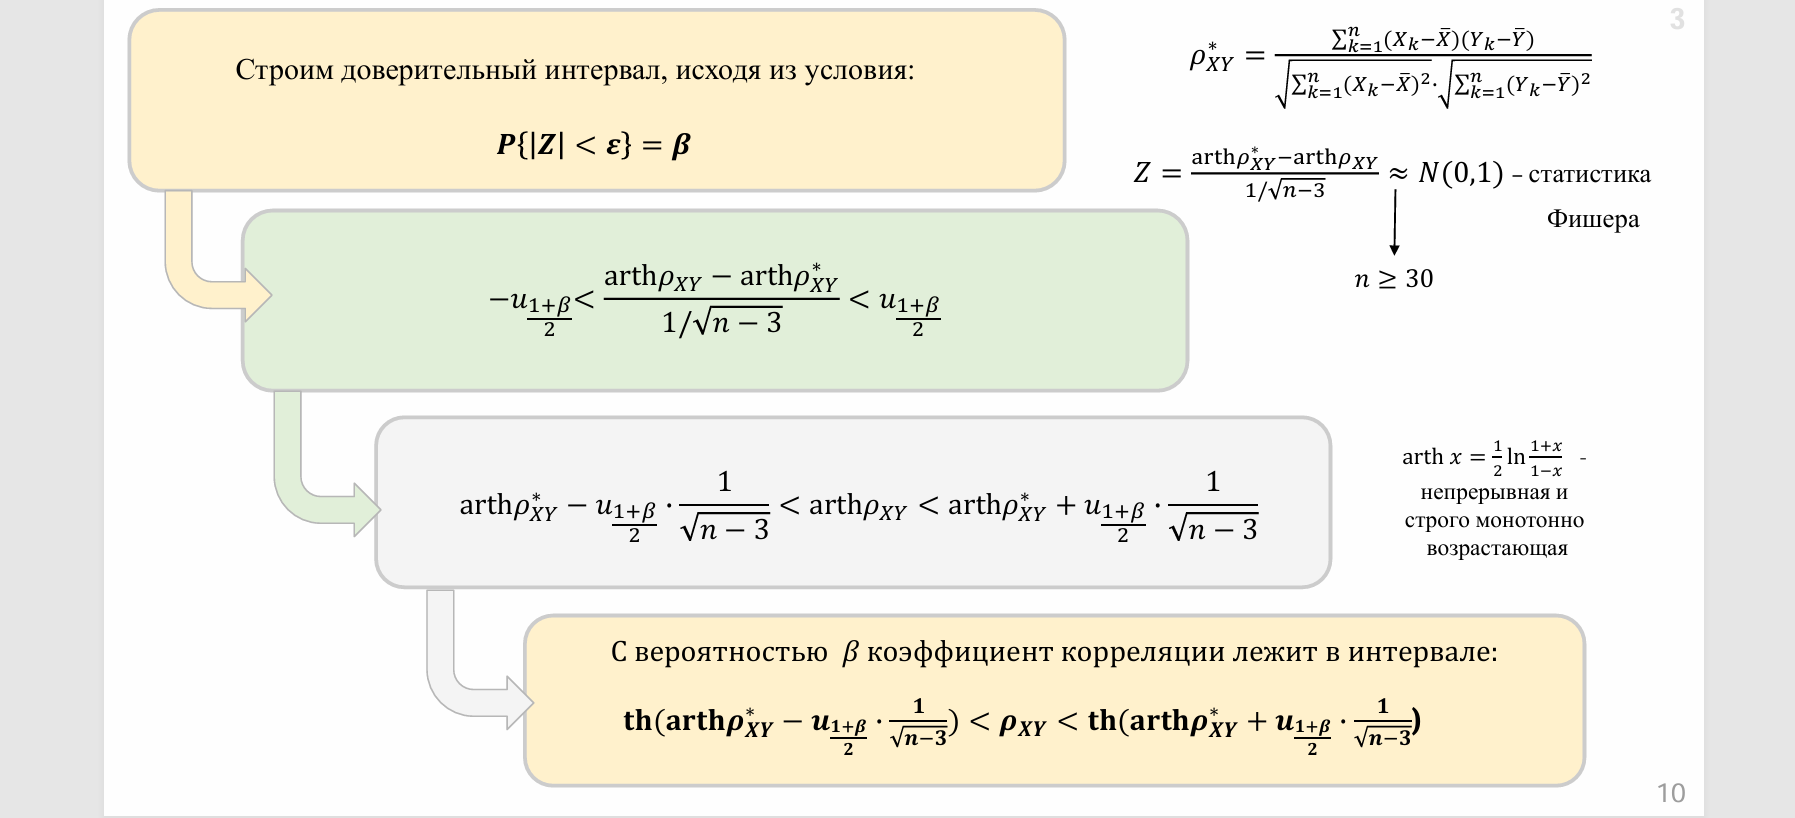

In [21]:
import math
import numpy as np
alpha=[0.05, 0.1, 0.5, 0.8]
for i in alpha:
    x1=math.tanh(1/2*np.log((1+r)/(1-r))-sts.norm.ppf(1-i/2)/np.sqrt(n-3))
    x2=math.tanh(1/2*np.log((1+r)/(1-r))+sts.norm.ppf(1-i/2)/np.sqrt(n-3))
    print('alpha = ',i,' доверительный интервал для коэффициента корреляции:(',x1,',',x2,')')

alpha =  0.05  доверительный интервал для коэффициента корреляции:( -0.5495979972425785 , -0.45711632349971587 )
alpha =  0.1  доверительный интервал для коэффициента корреляции:( -0.5425946036621624 , -0.4649745595390587 )
alpha =  0.5  доверительный интервал для коэффициента корреляции:( -0.5205499141112344 , -0.48871533351806923 )
alpha =  0.8  доверительный интервал для коэффициента корреляции:( -0.5107589469437007 , -0.49880109728356514 )


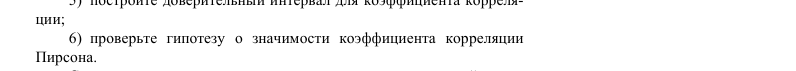

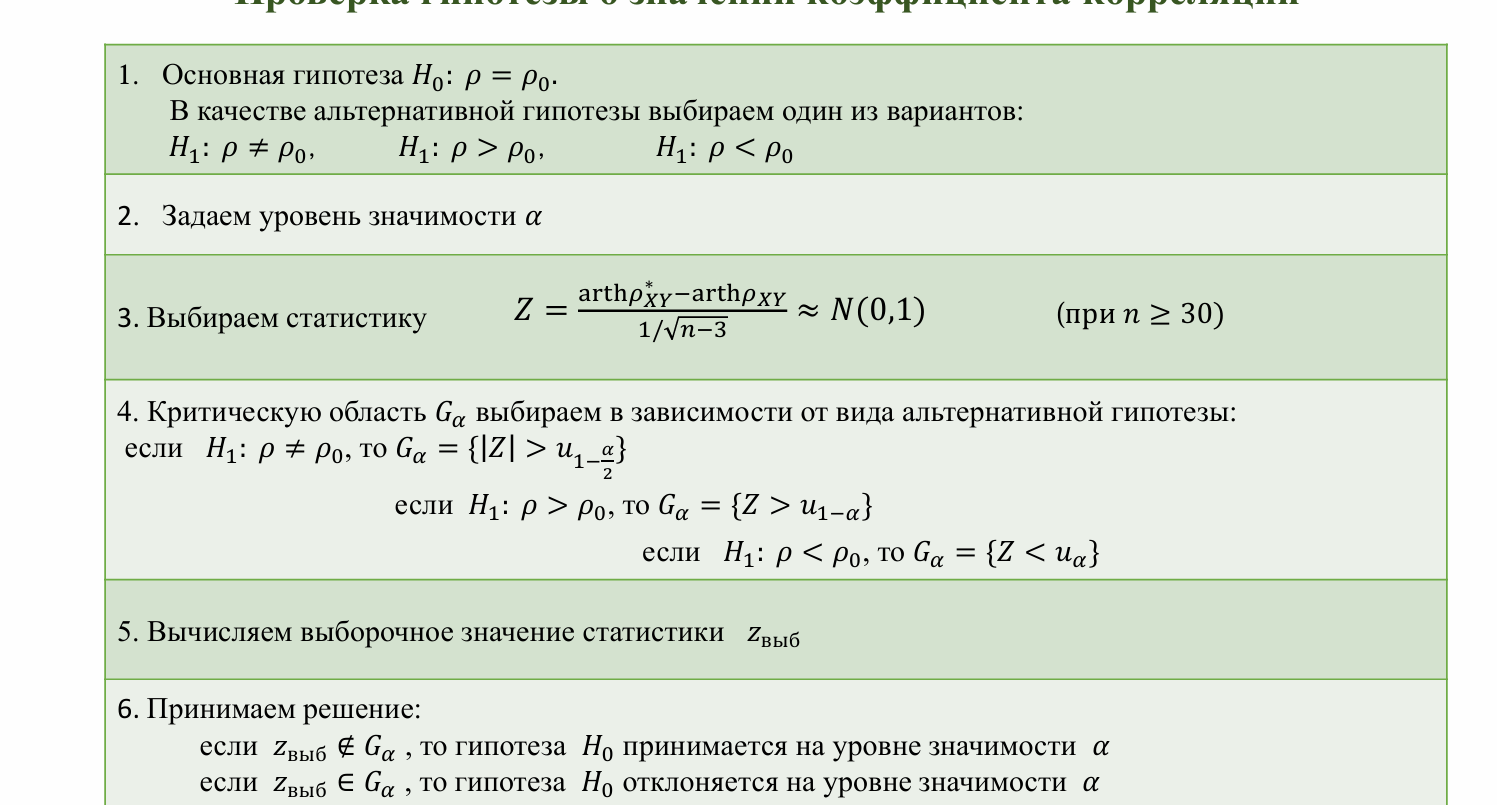

In [16]:
##H0: po=0 H1:p!=0
st=sts.t(n-2)
alpha=np.linspace(0,1,n)
zz_v=1/2*np.log((1+r)/(1-r))*(np.sqrt(n-3))
i=0
while abs(zz_v)<st.ppf(1-alpha[i]):
  i+=1
print(f"Значение вероятности p = {alpha[i]}","Значение очень маленькое, следовательно отвергаем гипотезу H0") 


Значение вероятности p = 0.00010001000100010001 Значение очень маленькое, следовательно отвергаем гипотезу H0


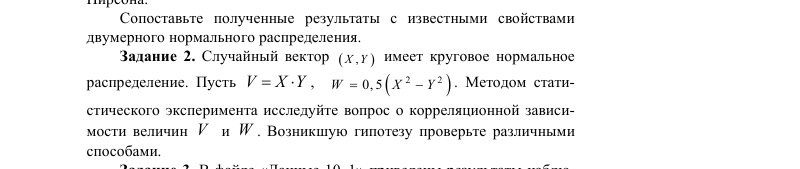

In [17]:
mean = [1, 2]  
cov = [[1, 0], [0, 1]] 
pearson_correlations = []
spearman_correlations = []
p_values=[]
num_experiments = 20#Количество экспериментов всего 20 потому что долго работает двойной цикл
V=[]
W=[]
for i in range(num_experiments):
    # Генерируем случайные величины X и Y из многомерного нормального распределения
    xy = np.random.multivariate_normal(mean, cov, 100)
    X = list(xy[:, 0])
    Y = list(xy[:, 1])
    for i in range(len(X)): ##То,что обсуждали на занятии перемножил каждое с каждым
        for j in range(len(Y)):
            V.append(X[i]*Y[j])
            W.append(0.5*(X[i]**2-Y[j]**2))
    pearson_corr = sts.pearsonr(V, W)#Пирсон 
    spearman_corr = sts.spearmanr(V, W)#Спирман

    # Сохраняем результаты
    pearson_correlations.append(pearson_corr[0])
    spearman_correlations.append(spearman_corr[0])
    p_values.append(pearson_corr[1])  # p-значение из теста Пирсона

print("Коэффициент корреляции Пирсона:", sum(pearson_correlations) / num_experiments)
print("Коэффициент корреляции Спирмена:", sum(spearman_correlations) / num_experiments)
print("Среднее p-значение:", sum(p_values) / num_experiments)

# Проверка гипотезы при заданном уровне значимости alpha
alpha = sum(p_values) / num_experiments
print("При alpha <",alpha, "мы принимаем гипотезу Н0 ")

Коэффициент корреляции Пирсона: -0.00880448184988578
Коэффициент корреляции Спирмена: -0.028122142106181303
Среднее p-значение: 0.0965839214715666
При alpha < 0.0965839214715666 мы принимаем гипотезу Н0 


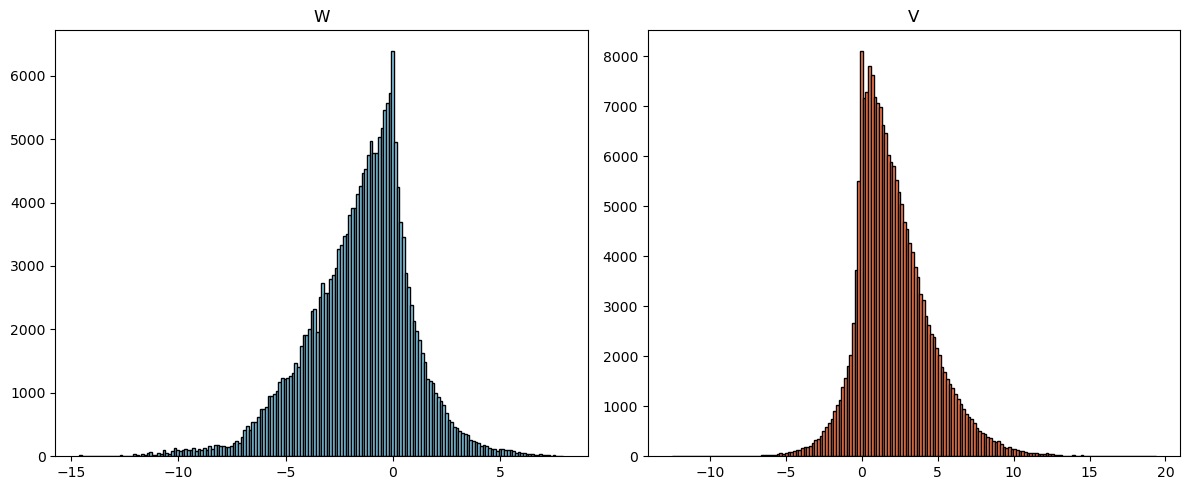

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].hist(W, bins=180, color='skyblue', edgecolor='black')
axes[0].set_title('W')
axes[0].set_xlabel('')
axes[0].set_ylabel('')
axes[1].hist(V, bins=180, color='coral', edgecolor='black')
axes[1].set_title('V')
axes[1].set_xlabel('')
axes[1].set_ylabel('')
plt.tight_layout()
plt.show()
#Обе величины распределены нормально

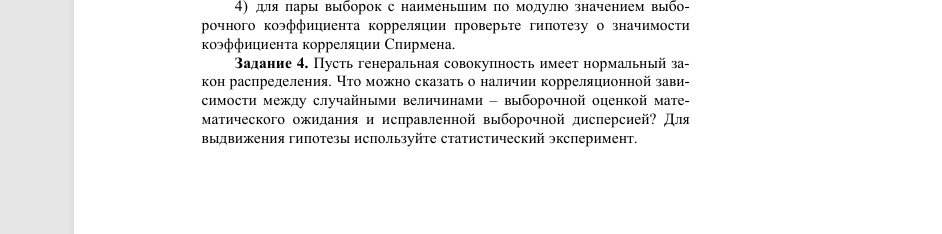

[[1.         0.01024814]
 [0.01024814 1.        ]] 

Корреляционная матрица Пирсона:
          0         1
0  1.000000  0.010248
1  0.010248  1.000000 

Корреляционная матрица Спирмена:
         0        1
0  1.00000  0.01035
1  0.01035  1.00000


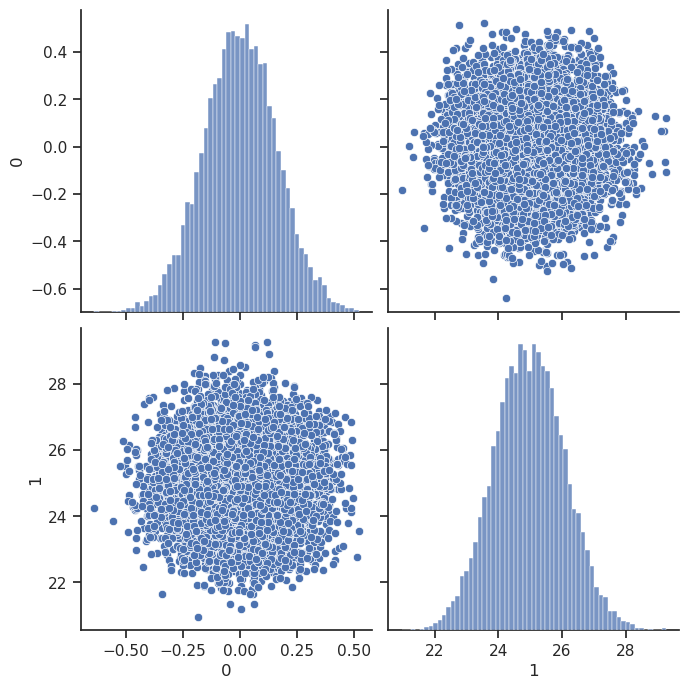

In [19]:
N=10000
n=1000
mean_=[]
S_=[]
#cгенерировал выборки циклом и в каждой посчитал среднее и дисперсию исправленную
for i in range(N):
    x=np.random.normal(0,5,size=n)
    mean_.append(np.mean(x))
    S_.append(np.var(x, ddof=1))
ms = np.append(mean_, S_).reshape(2, N).T
df_ms = pd.DataFrame(ms)
print(np.corrcoef(mean_, S_, rowvar=False ) , '\n')

print('Корреляционная матрица Пирсона:')
print(df_ms.corr() , '\n')

print('Корреляционная матрица Спирмена:')
print(df_ms.corr('spearman'))

seaborn.set(style='ticks', color_codes=True)
seaborn.pairplot(df_ms, height=3.5)


In [ ]:
# H0:
p_,p_value=sts.pearsonr(mean_,S_)
print(p_)
p = 0
z_v=0.5*np.log((1+p_)/(1-p_))
alpha=0.05
x1=math.tanh(1/2*np.log((1+p_)/(1-p_))-sts.norm.ppf(1-alpha/2)/np.sqrt(n-3))
x2=math.tanh(1/2*np.log((1+p_)/(1-p_))+sts.norm.ppf(1-alpha/2)/np.sqrt(n-3))
print(f"Доверительный интервал: ({x1},{x2})")
if(x1<p<x2):
  print("принимаем гипотезу Н0")
else:
  print("отвергаем гипотезу Н0")

t=sts.t(n-2)
alpha=np.linspace(0,1,n)
t_v=p_/((1-p_**2)**0.5)*(n-2)**0.5
i=0
while abs(t_v)<t.ppf(1-alpha[i]):
  i+=1
print("При alpha <", alpha[i],"принимаем гипотезу H0")


0.010248139993951076
Доверительный интервал: (-0.05177783766340543,0.07219535577218252)
принимаем гипотезу Н0
При alpha < 0.3733733733733734 принимаем гипотезу H0


В доверительный интервал попал 0, значение коэффициента корреляции близко к 0, следовательно можно сделать вывод, что отуствует корреляционная зависимость